# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

22:18:38 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=202431;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=760857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=886633;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=312299;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

22:18:39 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=904319;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=16349;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

22:18:41 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=104310;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=197478;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

22:18:42 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=567542;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=344713;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

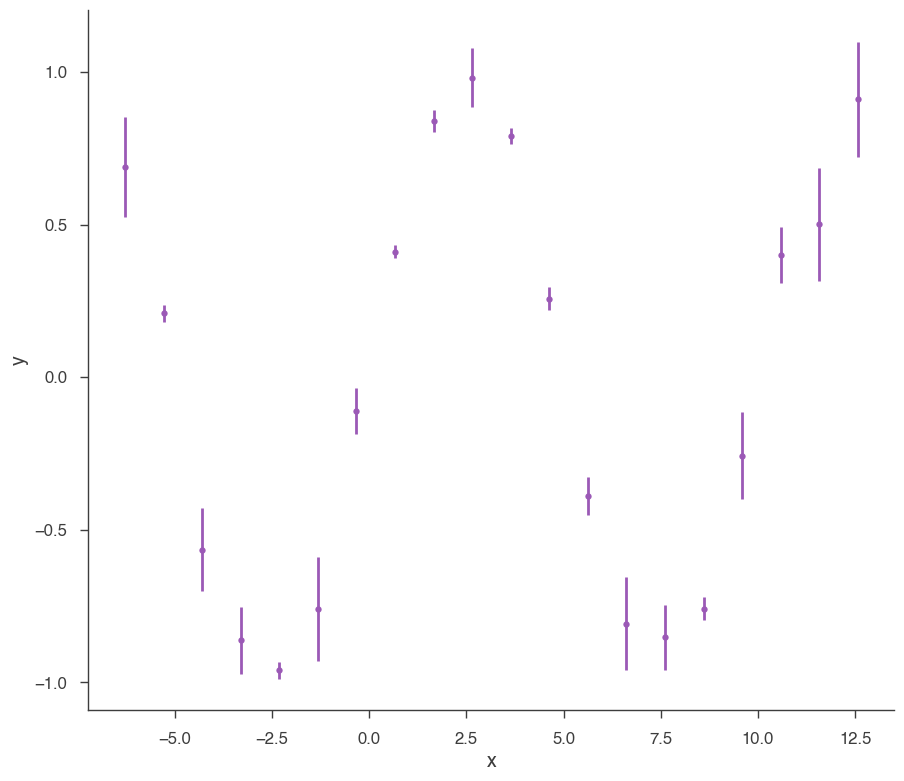

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=14060;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=291555;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

22:18:46 INFO      Mean acceptance fraction: 0.7144                                            ]8;id=941120;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=689299;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

22:18:47 INFO      fit restored to maximum of posterior                                         ]8;id=522496;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=277820;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=232116;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=562419;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                            
demo.spectrum.main.Sin.K  (9.91 -0.16 +0.15) x 10^-1  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (9.99 -0.05 +0.06) x 10^-2        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo         -6.598494
total        -6.598494

Values of statistical measures:

statistical measures
AIC              17.902870
BIC              19.188452
DIC              17.239380
PDIC              2.017942

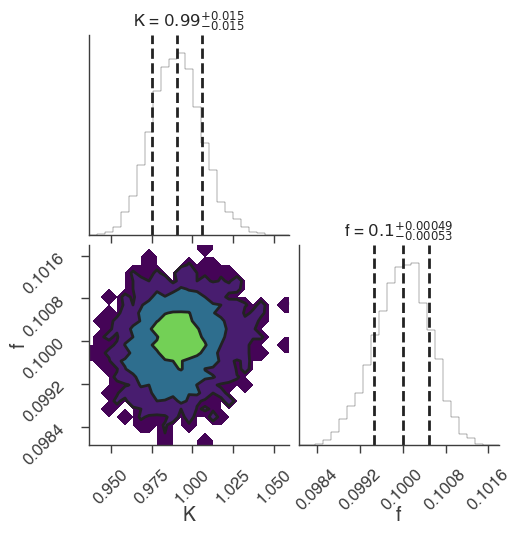

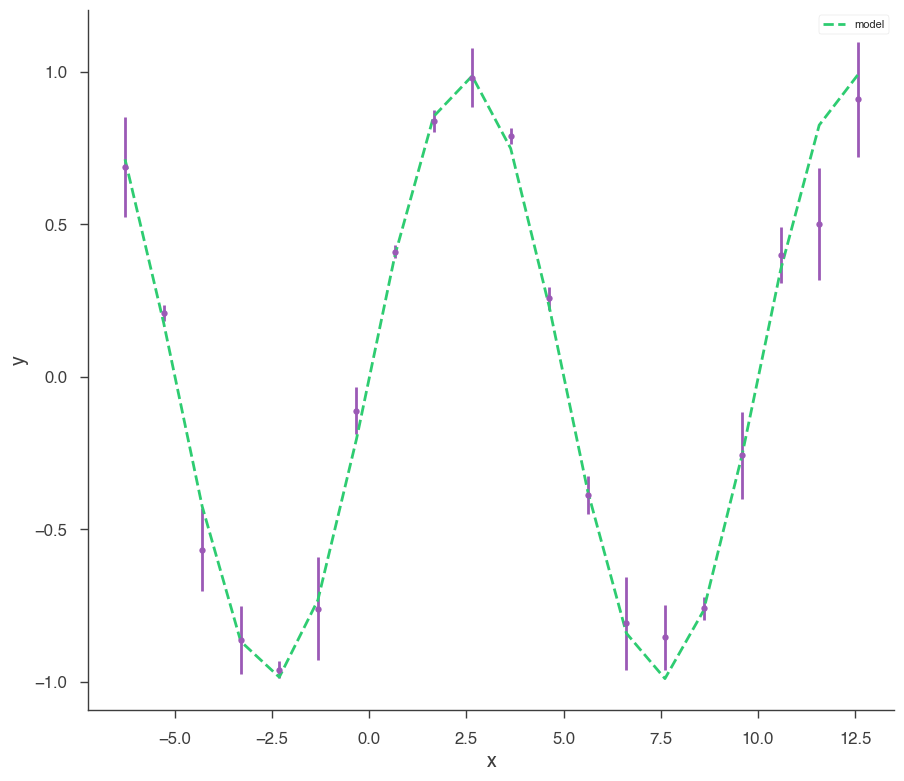

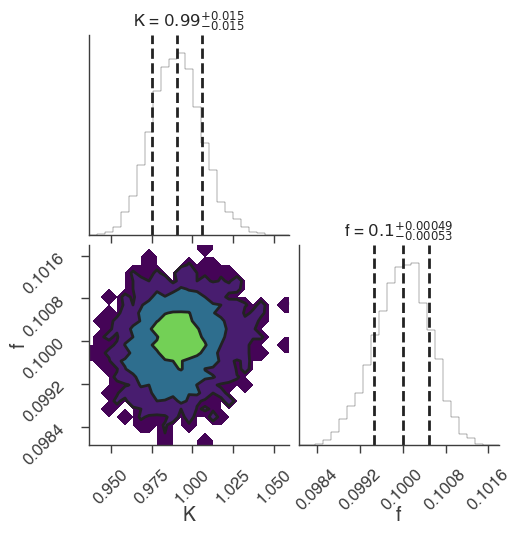

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

22:18:48 INFO      sampler set to multinest                                                ]8;id=412341;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=829167;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -15.697095151737290      +/-  0.14206543454228004     
 Total Likelihood Evaluations:         6722
 Sampling finished. Exiting MultiNest



22:18:50 INFO      fit restored to maximum of posterior                                         ]8;id=314960;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=509741;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=596766;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=700460;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                          
demo.spectrum.main.Sin.K   (9.91 +/- 0.16) x 10^-1  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (10.00 +/- 0.05) x 10^-2        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo         -6.599193
total        -6.599193

Values of statistical measures:

statistical measures
AIC                17.904268
BIC                19.189851
DIC                17.356304
PDIC                2.078925
log(Z)             -6.817162

         INFO      deleting the chain directory chains                                     ]8;id=334927;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=321251;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

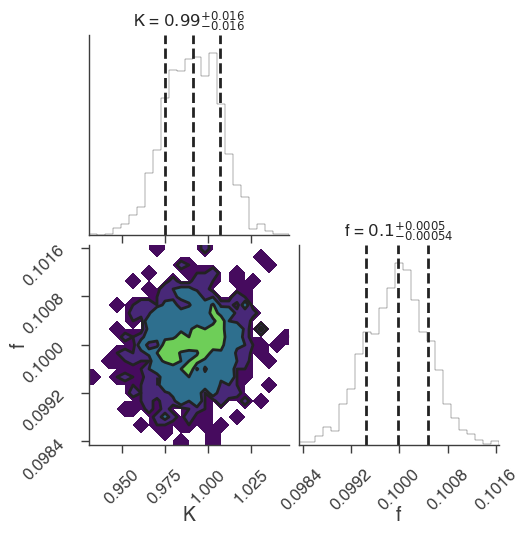

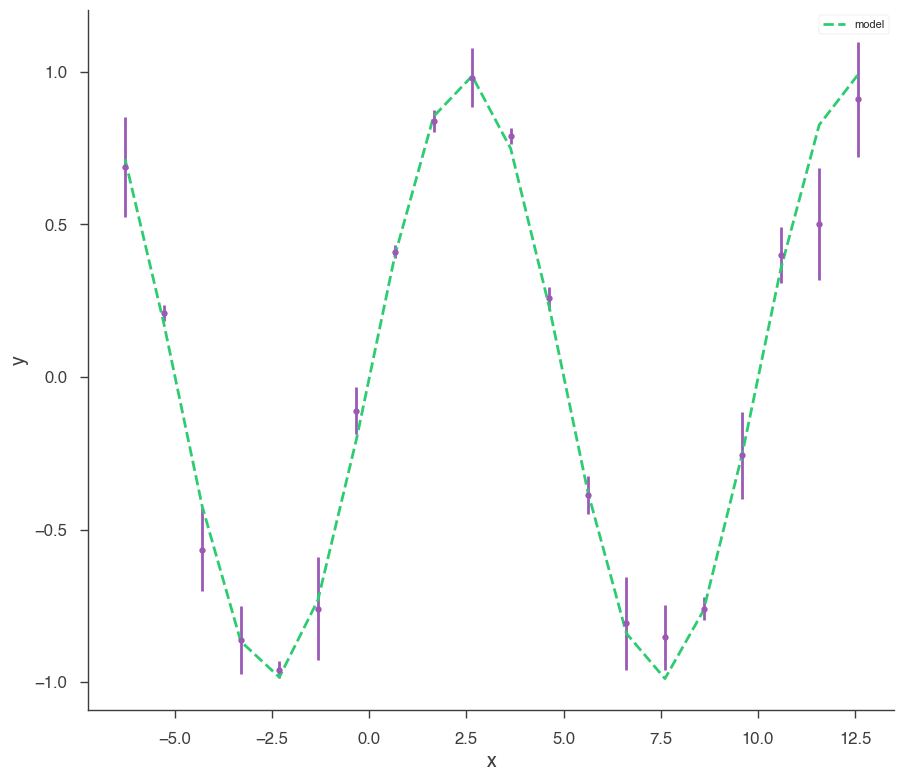

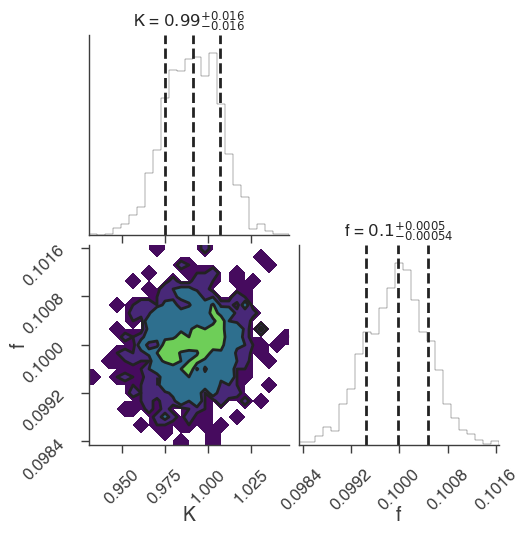

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

22:18:51 INFO      sampler set to dynesty_nested                                           ]8;id=939959;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=967931;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

220it [00:00, 2199.80it/s, bound: 0 | nc: 1 | ncall: 694 | eff(%): 31.700 | loglstar:   -inf < -3599.070 <    inf | logz: -3606.304 +/-  0.134 | dlogz: 3606.224 >  0.409]

440it [00:00, 1427.83it/s, bound: 0 | nc: 1 | ncall: 1198 | eff(%): 36.728 | loglstar:   -inf < -2641.566 <    inf | logz: -2648.463 +/-  0.125 | dlogz: 2635.569 >  0.409]

599it [00:00, 1327.50it/s, bound: 0 | nc: 12 | ncall: 1765 | eff(%): 33.938 | loglstar:   -inf < -2104.089 <    inf | logz: -2111.894 +/-  0.133 | dlogz: 2099.304 >  0.409]

740it [00:00, 908.52it/s, bound: 0 | nc: 14 | ncall: 2626 | eff(%): 28.180 | loglstar:   -inf < -1786.203 <    inf | logz: -1794.122 +/-  0.136 | dlogz: 1781.018 >  0.409] 

847it [00:00, 830.70it/s, bound: 0 | nc: 5 | ncall: 3458 | eff(%): 24.494 | loglstar:   -inf < -1269.503 <    inf | logz: -1277.256 +/-  0.134 | dlogz: 1263.202 >  0.409] 

940it [00:01, 603.84it/s, bound: 0 | nc: 8 | ncall: 4371 | eff(%): 21.505 | loglstar:   -inf < -953.279 <    inf | logz: -962.180 +/-  0.146 | dlogz: 949.937 >  0.409]   

1012it [00:01, 570.99it/s, bound: 0 | nc: 2 | ncall: 5196 | eff(%): 19.477 | loglstar:   -inf < -783.982 <    inf | logz: -792.386 +/-  0.141 | dlogz: 779.483 >  0.409]

1076it [00:01, 514.61it/s, bound: 0 | nc: 66 | ncall: 6231 | eff(%): 17.268 | loglstar:   -inf < -635.304 <    inf | logz: -644.275 +/-  0.142 | dlogz: 632.621 >  0.409]

1132it [00:01, 453.25it/s, bound: 0 | nc: 9 | ncall: 7073 | eff(%): 16.005 | loglstar:   -inf < -528.944 <    inf | logz: -537.234 +/-  0.141 | dlogz: 524.697 >  0.409] 

1180it [00:01, 378.56it/s, bound: 0 | nc: 4 | ncall: 7936 | eff(%): 14.869 | loglstar:   -inf < -468.288 <    inf | logz: -476.661 +/-  0.140 | dlogz: 464.046 >  0.409]

1221it [00:02, 275.50it/s, bound: 0 | nc: 24 | ncall: 8654 | eff(%): 14.109 | loglstar:   -inf < -433.610 <    inf | logz: -441.790 +/-  0.136 | dlogz: 428.852 >  0.409]

1253it [00:02, 257.23it/s, bound: 0 | nc: 3 | ncall: 9284 | eff(%): 13.496 | loglstar:   -inf < -402.224 <    inf | logz: -411.203 +/-  0.142 | dlogz: 400.699 >  0.409] 

1282it [00:02, 233.41it/s, bound: 0 | nc: 24 | ncall: 10065 | eff(%): 12.737 | loglstar:   -inf < -375.649 <    inf | logz: -384.053 +/-  0.140 | dlogz: 373.188 >  0.409]

1307it [00:02, 206.17it/s, bound: 0 | nc: 58 | ncall: 10904 | eff(%): 11.986 | loglstar:   -inf < -354.543 <    inf | logz: -362.949 +/-  0.139 | dlogz: 351.898 >  0.409]

1329it [00:02, 190.42it/s, bound: 0 | nc: 5 | ncall: 11531 | eff(%): 11.525 | loglstar:   -inf < -335.383 <    inf | logz: -344.730 +/-  0.146 | dlogz: 334.360 >  0.409] 

1355it [00:02, 201.51it/s, bound: 0 | nc: 66 | ncall: 12204 | eff(%): 11.103 | loglstar:   -inf < -317.472 <    inf | logz: -325.786 +/-  0.135 | dlogz: 314.479 >  0.409]

1376it [00:03, 175.16it/s, bound: 0 | nc: 7 | ncall: 12924 | eff(%): 10.647 | loglstar:   -inf < -306.168 <    inf | logz: -314.589 +/-  0.136 | dlogz: 303.288 >  0.409] 

1395it [00:03, 159.82it/s, bound: 0 | nc: 23 | ncall: 13505 | eff(%): 10.330 | loglstar:   -inf < -292.596 <    inf | logz: -301.609 +/-  0.141 | dlogz: 290.452 >  0.409]

1412it [00:03, 154.37it/s, bound: 0 | nc: 81 | ncall: 14041 | eff(%): 10.056 | loglstar:   -inf < -280.538 <    inf | logz: -289.660 +/-  0.140 | dlogz: 278.415 >  0.409]

1428it [00:03, 127.70it/s, bound: 1 | nc: 1 | ncall: 14184 | eff(%): 10.068 | loglstar:   -inf < -270.608 <    inf | logz: -279.627 +/-  0.142 | dlogz: 268.334 >  0.409] 

1625it [00:03, 508.98it/s, bound: 1 | nc: 5 | ncall: 14482 | eff(%): 11.221 | loglstar:   -inf < -179.605 <    inf | logz: -188.411 +/-  0.142 | dlogz: 177.959 >  0.409]

1751it [00:03, 502.19it/s, bound: 2 | nc: 1 | ncall: 14772 | eff(%): 11.854 | loglstar:   -inf < -136.241 <    inf | logz: -145.300 +/-  0.143 | dlogz: 134.498 >  0.409]

1948it [00:04, 785.74it/s, bound: 2 | nc: 5 | ncall: 15058 | eff(%): 12.937 | loglstar:   -inf < -84.709 <    inf | logz: -94.115 +/-  0.144 | dlogz: 82.775 >  0.409]   

2051it [00:04, 828.01it/s, bound: 2 | nc: 1 | ncall: 15290 | eff(%): 13.414 | loglstar:   -inf < -67.147 <    inf | logz: -76.206 +/-  0.142 | dlogz: 64.544 >  0.409]

2152it [00:04, 702.35it/s, bound: 3 | nc: 1 | ncall: 15455 | eff(%): 13.924 | loglstar:   -inf < -54.108 <    inf | logz: -63.644 +/-  0.146 | dlogz: 51.754 >  0.409]

2329it [00:04, 928.96it/s, bound: 3 | nc: 1 | ncall: 15739 | eff(%): 14.798 | loglstar:   -inf < -36.758 <    inf | logz: -45.985 +/-  0.145 | dlogz: 33.631 >  0.409]

2442it [00:04, 732.74it/s, bound: 4 | nc: 1 | ncall: 15988 | eff(%): 15.274 | loglstar:   -inf < -29.726 <    inf | logz: -38.897 +/-  0.142 | dlogz: 26.239 >  0.409]

2597it [00:04, 894.10it/s, bound: 4 | nc: 1 | ncall: 16213 | eff(%): 16.018 | loglstar:   -inf < -22.615 <    inf | logz: -31.631 +/-  0.142 | dlogz: 18.561 >  0.409]

2709it [00:04, 938.35it/s, bound: 4 | nc: 2 | ncall: 16422 | eff(%): 16.496 | loglstar:   -inf < -18.949 <    inf | logz: -28.305 +/-  0.143 | dlogz: 14.958 >  0.409]

2820it [00:05, 807.50it/s, bound: 5 | nc: 1 | ncall: 16641 | eff(%): 16.946 | loglstar:   -inf < -15.840 <    inf | logz: -25.171 +/-  0.145 | dlogz: 11.539 >  0.409]

2915it [00:05, 673.57it/s, bound: 5 | nc: 1 | ncall: 16784 | eff(%): 17.368 | loglstar:   -inf < -14.080 <    inf | logz: -23.229 +/-  0.144 | dlogz:  9.351 >  0.409]

3074it [00:05, 856.98it/s, bound: 5 | nc: 6 | ncall: 17094 | eff(%): 17.983 | loglstar:   -inf < -11.544 <    inf | logz: -20.805 +/-  0.144 | dlogz:  6.527 >  0.409]

3178it [00:05, 610.22it/s, bound: 6 | nc: 3 | ncall: 17258 | eff(%): 18.415 | loglstar:   -inf < -10.500 <    inf | logz: -19.751 +/-  0.143 | dlogz:  5.215 >  0.409]

3315it [00:05, 745.11it/s, bound: 6 | nc: 3 | ncall: 17474 | eff(%): 18.971 | loglstar:   -inf < -9.407 <    inf | logz: -18.668 +/-  0.144 | dlogz:  3.814 >  0.409] 

3426it [00:05, 818.66it/s, bound: 6 | nc: 4 | ncall: 17683 | eff(%): 19.375 | loglstar:   -inf < -8.757 <    inf | logz: -18.023 +/-  0.144 | dlogz:  2.923 >  0.409]

3529it [00:06, 683.43it/s, bound: 7 | nc: 1 | ncall: 17845 | eff(%): 19.776 | loglstar:   -inf < -8.334 <    inf | logz: -17.576 +/-  0.143 | dlogz:  2.271 >  0.409]

3658it [00:06, 805.88it/s, bound: 7 | nc: 6 | ncall: 18034 | eff(%): 20.284 | loglstar:   -inf < -7.845 <    inf | logz: -17.143 +/-  0.144 | dlogz:  1.626 >  0.409]

3770it [00:06, 876.19it/s, bound: 7 | nc: 2 | ncall: 18259 | eff(%): 20.647 | loglstar:   -inf < -7.533 <    inf | logz: -16.853 +/-  0.144 | dlogz:  1.196 >  0.409]

3873it [00:06, 664.96it/s, bound: 8 | nc: 1 | ncall: 18441 | eff(%): 21.002 | loglstar:   -inf < -7.312 <    inf | logz: -16.645 +/-  0.144 | dlogz:  0.896 >  0.409]

4048it [00:06, 882.23it/s, bound: 8 | nc: 1 | ncall: 18720 | eff(%): 21.624 | loglstar:   -inf < -7.092 <    inf | logz: -16.395 +/-  0.144 | dlogz:  0.547 >  0.409]

4153it [00:06, 611.51it/s, +400 | bound: 8 | nc: 1 | ncall: 19322 | eff(%): 24.062 | loglstar:   -inf < -6.608 <    inf | logz: -15.942 +/-  0.144 | dlogz:  0.001 >  0.409]

22:18:59 INFO      fit restored to maximum of posterior                                         ]8;id=457098;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=693797;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=997010;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=797700;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                         
demo.spectrum.main.Sin.K  (9.91 +/- 0.16) x 10^-1  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (9.99 +/- 0.05) x 10^-2        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo         -6.598725
total        -6.598725

Values of statistical measures:

statistical measures
AIC                17.903332
BIC                19.188914
DIC                17.335774
PDIC                2.068719
log(Z)             -6.923581

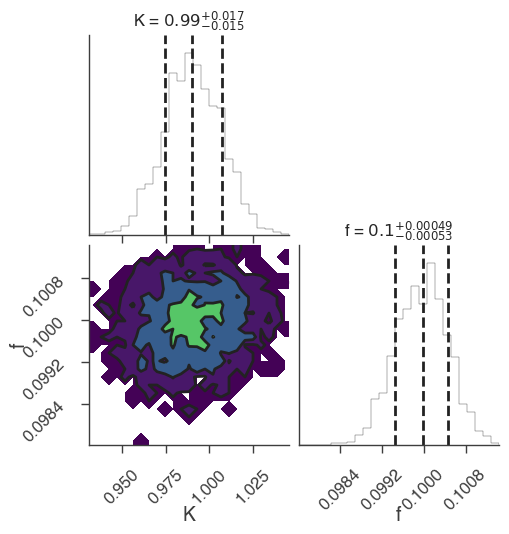

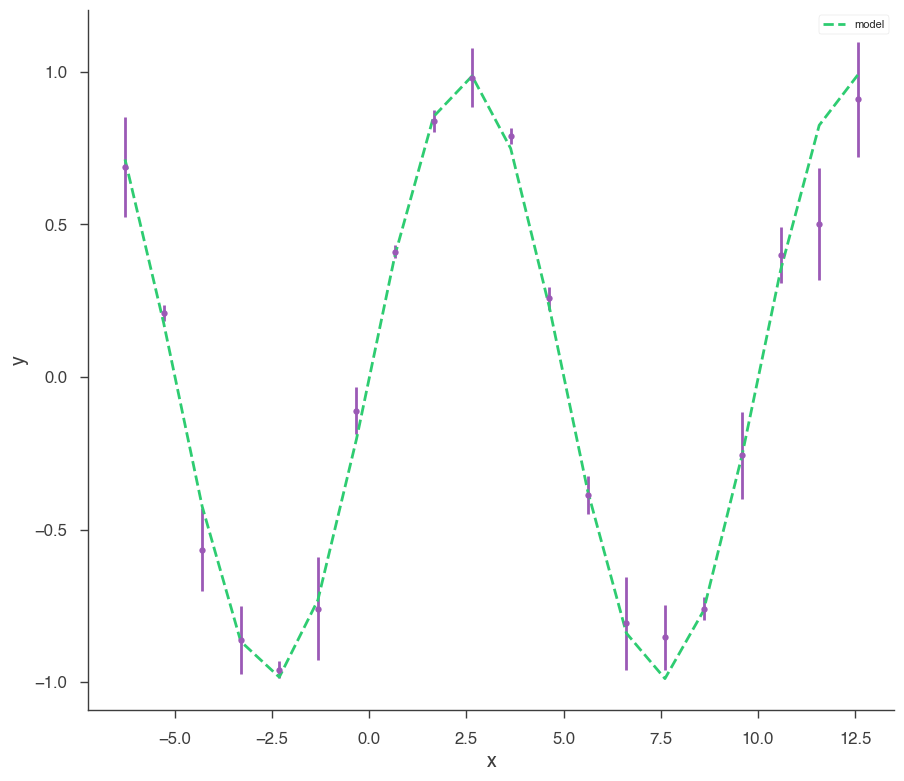

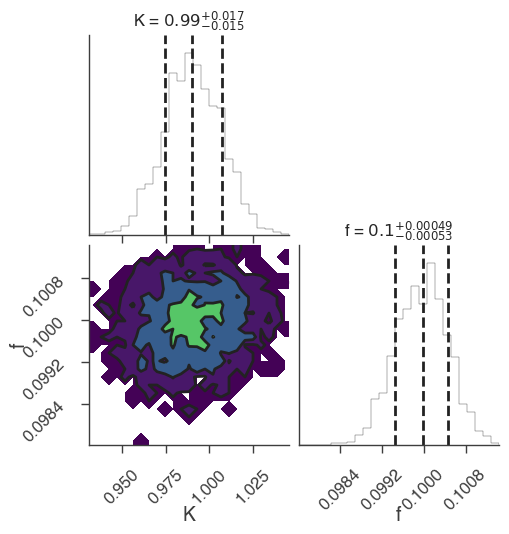

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

22:19:00 INFO      sampler set to dynesty_dynamic                                          ]8;id=739099;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=604833;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

1it [00:00,  7.81it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 1 | eff(%):  0.200 | loglstar:   -inf < -9730.319 <    inf | logz: -9737.229 +/-  0.117 | dlogz:    inf >  0.010]

113it [00:00, 593.49it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 122 | eff(%): 18.167 | loglstar:   -inf < -5080.547 <    inf | logz: -5087.674 +/-  0.119 | dlogz: 5070.630 >  0.010]

242it [00:00, 892.34it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 306 | eff(%): 30.025 | loglstar:   -inf < -3801.351 <    inf | logz: -3808.742 +/-  0.121 | dlogz: 3808.676 >  0.010]

337it [00:00, 865.98it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 460 | eff(%): 35.104 | loglstar:   -inf < -3336.960 <    inf | logz: -3343.678 +/-  0.110 | dlogz: 3335.811 >  0.010]

473it [00:00, 1032.56it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 751 | eff(%): 37.810 | loglstar:   -inf < -2915.463 <    inf | logz: -2921.918 +/-  0.110 | dlogz: 2913.418 >  0.010]

580it [00:00, 905.09it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 1022 | eff(%): 38.108 | loglstar:   -inf < -2593.152 <    inf | logz: -2600.827 +/-  0.118 | dlogz: 2594.527 >  0.010]

685it [00:00, 945.53it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 1397 | eff(%): 36.110 | loglstar:   -inf < -2337.326 <    inf | logz: -2345.590 +/-  0.128 | dlogz: 2342.345 >  0.010]

784it [00:01, 655.59it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 1860 | eff(%): 33.220 | loglstar:   -inf < -2153.064 <    inf | logz: -2161.455 +/-  0.127 | dlogz: 2156.069 >  0.010]

864it [00:01, 680.34it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 2254 | eff(%): 31.373 | loglstar:   -inf < -2008.775 <    inf | logz: -2016.491 +/-  0.118 | dlogz: 2008.928 >  0.010]

943it [00:01, 690.18it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 2648 | eff(%): 29.956 | loglstar:   -inf < -1931.436 <    inf | logz: -1938.188 +/-  0.110 | dlogz: 1929.962 >  0.010]

1020it [00:01, 652.97it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 3127 | eff(%): 28.122 | loglstar:   -inf < -1610.162 <    inf | logz: -1619.108 +/-  0.134 | dlogz: 1626.459 >  0.010]

1091it [00:01, 636.18it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 3599 | eff(%): 26.616 | loglstar:   -inf < -1351.994 <    inf | logz: -1360.769 +/-  0.126 | dlogz: 1353.604 >  0.010]

1159it [00:01, 579.75it/s, batch: 0 | bound: 0 | nc: 12 | ncall: 4195 | eff(%): 24.686 | loglstar:   -inf < -1096.884 <    inf | logz: -1106.107 +/-  0.136 | dlogz: 1105.564 >  0.010]

1220it [00:01, 541.08it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 4899 | eff(%): 22.597 | loglstar:   -inf < -907.924 <    inf | logz: -916.564 +/-  0.127 | dlogz: 908.695 >  0.010]    

1277it [00:01, 469.90it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 5640 | eff(%): 20.798 | loglstar:   -inf < -788.123 <    inf | logz: -796.019 +/-  0.120 | dlogz: 787.342 >  0.010]

1327it [00:02, 449.02it/s, batch: 0 | bound: 0 | nc: 13 | ncall: 6158 | eff(%): 19.931 | loglstar:   -inf < -686.807 <    inf | logz: -695.597 +/-  0.127 | dlogz: 687.256 >  0.010]

1374it [00:02, 438.54it/s, batch: 0 | bound: 0 | nc: 24 | ncall: 6791 | eff(%): 18.845 | loglstar:   -inf < -612.067 <    inf | logz: -621.603 +/-  0.135 | dlogz: 614.683 >  0.010]

1419it [00:02, 432.53it/s, batch: 0 | bound: 0 | nc: 17 | ncall: 7445 | eff(%): 17.860 | loglstar:   -inf < -542.056 <    inf | logz: -550.805 +/-  0.124 | dlogz: 542.076 >  0.010]

1463it [00:02, 353.00it/s, batch: 0 | bound: 0 | nc: 36 | ncall: 8325 | eff(%): 16.578 | loglstar:   -inf < -493.076 <    inf | logz: -502.111 +/-  0.127 | dlogz: 493.494 >  0.010]

1501it [00:02, 268.52it/s, batch: 0 | bound: 0 | nc: 12 | ncall: 9091 | eff(%): 15.650 | loglstar:   -inf < -456.489 <    inf | logz: -465.994 +/-  0.131 | dlogz: 457.742 >  0.010]

1532it [00:02, 246.44it/s, batch: 0 | bound: 0 | nc: 76 | ncall: 9848 | eff(%): 14.805 | loglstar:   -inf < -434.093 <    inf | logz: -442.667 +/-  0.124 | dlogz: 433.465 >  0.010]

1560it [00:03, 237.30it/s, batch: 0 | bound: 0 | nc: 37 | ncall: 10488 | eff(%): 14.197 | loglstar:   -inf < -413.986 <    inf | logz: -422.557 +/-  0.125 | dlogz: 413.370 >  0.010]

1586it [00:03, 207.64it/s, batch: 0 | bound: 0 | nc: 12 | ncall: 11141 | eff(%): 13.624 | loglstar:   -inf < -398.893 <    inf | logz: -406.994 +/-  0.122 | dlogz: 397.519 >  0.010]

1609it [00:03, 187.84it/s, batch: 0 | bound: 0 | nc: 37 | ncall: 11940 | eff(%): 12.934 | loglstar:   -inf < -383.916 <    inf | logz: -393.003 +/-  0.129 | dlogz: 383.864 >  0.010]

1629it [00:03, 189.32it/s, batch: 0 | bound: 0 | nc: 49 | ncall: 12404 | eff(%): 12.624 | loglstar:   -inf < -368.271 <    inf | logz: -377.174 +/-  0.128 | dlogz: 367.926 >  0.010]

1649it [00:03, 188.16it/s, batch: 0 | bound: 0 | nc: 24 | ncall: 12948 | eff(%): 12.262 | loglstar:   -inf < -354.622 <    inf | logz: -363.851 +/-  0.126 | dlogz: 354.589 >  0.010]

1669it [00:03, 150.80it/s, batch: 0 | bound: 0 | nc: 52 | ncall: 13406 | eff(%): 12.002 | loglstar:   -inf < -342.563 <    inf | logz: -351.078 +/-  0.126 | dlogz: 341.491 >  0.010]

1695it [00:03, 172.02it/s, batch: 0 | bound: 0 | nc: 57 | ncall: 14082 | eff(%): 11.624 | loglstar:   -inf < -328.462 <    inf | logz: -337.273 +/-  0.125 | dlogz: 327.724 >  0.010]

1718it [00:04, 184.08it/s, batch: 0 | bound: 0 | nc: 13 | ncall: 14641 | eff(%): 11.347 | loglstar:   -inf < -316.280 <    inf | logz: -325.024 +/-  0.127 | dlogz: 315.394 >  0.010]

1738it [00:04, 153.34it/s, batch: 0 | bound: 0 | nc: 134 | ncall: 15722 | eff(%): 10.714 | loglstar:   -inf < -308.130 <    inf | logz: -317.159 +/-  0.128 | dlogz: 307.722 >  0.010]

1756it [00:04, 145.97it/s, batch: 0 | bound: 0 | nc: 31 | ncall: 16474 | eff(%): 10.345 | loglstar:   -inf < -300.709 <    inf | logz: -309.566 +/-  0.125 | dlogz: 299.845 >  0.010] 

1772it [00:04, 126.42it/s, batch: 0 | bound: 0 | nc: 13 | ncall: 17213 | eff(%): 10.004 | loglstar:   -inf < -292.034 <    inf | logz: -301.281 +/-  0.127 | dlogz: 291.687 >  0.010]

1786it [00:04, 104.43it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17263 | eff(%): 10.055 | loglstar:   -inf < -282.299 <    inf | logz: -291.715 +/-  0.133 | dlogz: 282.441 >  0.010] 

1945it [00:04, 399.57it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17479 | eff(%): 10.818 | loglstar:   -inf < -215.012 <    inf | logz: -224.246 +/-  0.128 | dlogz: 214.189 >  0.010]

2052it [00:04, 546.60it/s, batch: 0 | bound: 1 | nc: 3 | ncall: 17652 | eff(%): 11.305 | loglstar:   -inf < -172.242 <    inf | logz: -181.162 +/-  0.129 | dlogz: 170.684 >  0.010]

2183it [00:05, 727.13it/s, batch: 0 | bound: 1 | nc: 8 | ncall: 17958 | eff(%): 11.827 | loglstar:   -inf < -137.814 <    inf | logz: -147.110 +/-  0.127 | dlogz: 136.396 >  0.010]

2272it [00:05, 565.49it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18081 | eff(%): 12.228 | loglstar:   -inf < -118.898 <    inf | logz: -127.978 +/-  0.129 | dlogz: 117.020 >  0.010]

2378it [00:05, 554.25it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18216 | eff(%): 12.706 | loglstar:   -inf < -101.052 <    inf | logz: -110.581 +/-  0.128 | dlogz: 99.414 >  0.010] 

2505it [00:05, 696.96it/s, batch: 0 | bound: 2 | nc: 5 | ncall: 18430 | eff(%): 13.233 | loglstar:   -inf < -77.910 <    inf | logz: -87.176 +/-  0.128 | dlogz: 75.695 >  0.010]  

2610it [00:05, 774.79it/s, batch: 0 | bound: 2 | nc: 2 | ncall: 18662 | eff(%): 13.621 | loglstar:   -inf < -66.910 <    inf | logz: -75.557 +/-  0.125 | dlogz: 63.777 >  0.010]

2701it [00:06, 516.58it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 18819 | eff(%): 13.981 | loglstar:   -inf < -57.586 <    inf | logz: -67.174 +/-  0.127 | dlogz: 55.259 >  0.010]

2844it [00:06, 680.65it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19015 | eff(%): 14.573 | loglstar:   -inf < -43.104 <    inf | logz: -52.490 +/-  0.130 | dlogz: 40.265 >  0.010]

2986it [00:06, 830.88it/s, batch: 0 | bound: 3 | nc: 4 | ncall: 19277 | eff(%): 15.098 | loglstar:   -inf < -34.120 <    inf | logz: -43.453 +/-  0.128 | dlogz: 30.920 >  0.010]

3094it [00:06, 610.01it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 19527 | eff(%): 15.449 | loglstar:   -inf < -28.551 <    inf | logz: -38.020 +/-  0.130 | dlogz: 25.269 >  0.010]

3218it [00:06, 723.75it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 19675 | eff(%): 15.950 | loglstar:   -inf < -24.292 <    inf | logz: -33.556 +/-  0.128 | dlogz: 20.550 >  0.010]

3332it [00:06, 807.85it/s, batch: 0 | bound: 4 | nc: 3 | ncall: 19849 | eff(%): 16.374 | loglstar:   -inf < -20.661 <    inf | logz: -29.950 +/-  0.128 | dlogz: 16.710 >  0.010]

3464it [00:06, 923.55it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 20108 | eff(%): 16.809 | loglstar:   -inf < -17.694 <    inf | logz: -26.931 +/-  0.128 | dlogz: 13.420 >  0.010]

3575it [00:07, 635.63it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20305 | eff(%): 17.183 | loglstar:   -inf < -15.615 <    inf | logz: -24.865 +/-  0.129 | dlogz: 11.129 >  0.010]

3696it [00:07, 742.07it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20468 | eff(%): 17.627 | loglstar:   -inf < -13.534 <    inf | logz: -22.945 +/-  0.129 | dlogz:  8.966 >  0.010]

3828it [00:07, 862.92it/s, batch: 0 | bound: 5 | nc: 2 | ncall: 20695 | eff(%): 18.061 | loglstar:   -inf < -11.966 <    inf | logz: -21.271 +/-  0.129 | dlogz:  7.024 >  0.010]

3963it [00:07, 975.31it/s, batch: 0 | bound: 5 | nc: 4 | ncall: 20981 | eff(%): 18.449 | loglstar:   -inf < -10.793 <    inf | logz: -20.070 +/-  0.129 | dlogz:  5.554 >  0.010]

4080it [00:07, 733.93it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21134 | eff(%): 18.859 | loglstar:   -inf < -9.762 <    inf | logz: -19.212 +/-  0.129 | dlogz:  4.469 >  0.010] 

4231it [00:07, 890.85it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 21414 | eff(%): 19.307 | loglstar:   -inf < -8.831 <    inf | logz: -18.255 +/-  0.130 | dlogz:  3.237 >  0.010]

4343it [00:07, 886.09it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 21669 | eff(%): 19.590 | loglstar:   -inf < -8.384 <    inf | logz: -17.743 +/-  0.130 | dlogz:  2.542 >  0.010]

4448it [00:08, 511.59it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 21850 | eff(%): 19.902 | loglstar:   -inf < -8.020 <    inf | logz: -17.376 +/-  0.129 | dlogz:  2.023 >  0.010]

4529it [00:08, 349.32it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 21966 | eff(%): 20.159 | loglstar:   -inf < -7.766 <    inf | logz: -17.132 +/-  0.129 | dlogz:  1.681 >  0.010]

4672it [00:08, 480.71it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 22220 | eff(%): 20.563 | loglstar:   -inf < -7.485 <    inf | logz: -16.798 +/-  0.129 | dlogz:  1.211 >  0.010]

4793it [00:09, 433.70it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 22511 | eff(%): 20.829 | loglstar:   -inf < -7.294 <    inf | logz: -16.590 +/-  0.129 | dlogz:  0.917 >  0.010]

4940it [00:09, 573.21it/s, batch: 0 | bound: 8 | nc: 5 | ncall: 22688 | eff(%): 21.304 | loglstar:   -inf < -7.122 <    inf | logz: -16.400 +/-  0.129 | dlogz:  0.656 >  0.010]

5057it [00:09, 669.38it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 22887 | eff(%): 21.623 | loglstar:   -inf < -7.019 <    inf | logz: -16.285 +/-  0.129 | dlogz:  0.503 >  0.010]

5185it [00:09, 780.90it/s, batch: 0 | bound: 8 | nc: 3 | ncall: 23173 | eff(%): 21.903 | loglstar:   -inf < -6.926 <    inf | logz: -16.188 +/-  0.129 | dlogz:  0.378 >  0.010]

5293it [00:09, 544.92it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23336 | eff(%): 22.206 | loglstar:   -inf < -6.872 <    inf | logz: -16.123 +/-  0.129 | dlogz:  0.298 >  0.010]

5431it [00:10, 680.29it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23514 | eff(%): 22.616 | loglstar:   -inf < -6.815 <    inf | logz: -16.060 +/-  0.129 | dlogz:  0.221 >  0.010]

5555it [00:10, 784.11it/s, batch: 0 | bound: 9 | nc: 3 | ncall: 23727 | eff(%): 22.929 | loglstar:   -inf < -6.772 <    inf | logz: -16.016 +/-  0.129 | dlogz:  0.169 >  0.010]

5674it [00:10, 870.05it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23980 | eff(%): 23.178 | loglstar:   -inf < -6.737 <    inf | logz: -15.982 +/-  0.129 | dlogz:  0.132 >  0.010]

5785it [00:10, 688.75it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 24134 | eff(%): 23.484 | loglstar:   -inf < -6.712 <    inf | logz: -15.958 +/-  0.129 | dlogz:  0.104 >  0.010]

5929it [00:10, 837.45it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 24349 | eff(%): 23.860 | loglstar:   -inf < -6.687 <    inf | logz: -15.933 +/-  0.129 | dlogz:  0.078 >  0.010]

6036it [00:10, 757.10it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 24538 | eff(%): 24.107 | loglstar:   -inf < -6.672 <    inf | logz: -15.919 +/-  0.129 | dlogz:  0.062 >  0.010]

6136it [00:11, 601.03it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 24764 | eff(%): 24.288 | loglstar:   -inf < -6.661 <    inf | logz: -15.908 +/-  0.129 | dlogz:  0.051 >  0.010]

6281it [00:11, 756.44it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 24953 | eff(%): 24.677 | loglstar:   -inf < -6.646 <    inf | logz: -15.896 +/-  0.129 | dlogz:  0.038 >  0.010]

6440it [00:11, 929.33it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25225 | eff(%): 25.034 | loglstar:   -inf < -6.635 <    inf | logz: -15.886 +/-  0.129 | dlogz:  0.027 >  0.010]

6556it [00:11, 943.56it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25481 | eff(%): 25.234 | loglstar:   -inf < -6.629 <    inf | logz: -15.880 +/-  0.129 | dlogz:  0.022 >  0.010]

6667it [00:11, 611.02it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25640 | eff(%): 25.505 | loglstar:   -inf < -6.625 <    inf | logz: -15.876 +/-  0.129 | dlogz:  0.017 >  0.010]

6805it [00:11, 745.15it/s, batch: 0 | bound: 12 | nc: 3 | ncall: 25863 | eff(%): 25.813 | loglstar:   -inf < -6.621 <    inf | logz: -15.872 +/-  0.129 | dlogz:  0.013 >  0.010]

6918it [00:11, 820.26it/s, batch: 0 | bound: 12 | nc: 4 | ncall: 26083 | eff(%): 26.024 | loglstar:   -inf < -6.618 <    inf | logz: -15.869 +/-  0.129 | dlogz:  0.010 >  0.010]

7157it [00:12, 1167.91it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 26370 | eff(%): 26.855 | loglstar:   -inf < -6.613 <    inf | logz: -15.864 +/-  0.129 | dlogz:  0.006 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7438it [00:13, 433.94it/s, batch: 1 | bound: 0 | nc: 1 | ncall: 26651 | eff(%): 27.909 | loglstar: -8.346 < -7.850 < -7.113 | logz: -15.859 +/-  0.132 | stop:  1.406]            

7547it [00:13, 489.69it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 26775 | eff(%): 27.637 | loglstar: -8.346 < -8.047 < -7.113 | logz: -15.859 +/-  0.132 | stop:  1.406]

7655it [00:13, 552.73it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 26956 | eff(%): 27.848 | loglstar: -8.346 < -7.750 < -7.113 | logz: -15.859 +/-  0.132 | stop:  1.406]

7762it [00:13, 587.83it/s, batch: 1 | bound: 2 | nc: 4 | ncall: 27176 | eff(%): 28.013 | loglstar: -8.346 < -7.550 < -7.113 | logz: -15.859 +/-  0.132 | stop:  1.406]

7859it [00:13, 571.61it/s, batch: 1 | bound: 2 | nc: 4 | ncall: 27386 | eff(%): 28.149 | loglstar: -8.346 < -7.370 < -7.113 | logz: -15.859 +/-  0.132 | stop:  1.406]

7943it [00:14, 427.95it/s, batch: 1 | bound: 3 | nc: 3 | ncall: 27500 | eff(%): 28.334 | loglstar: -8.346 < -7.246 < -7.113 | logz: -15.859 +/-  0.132 | stop:  1.406]

8217it [00:14, 750.73it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 27850 | eff(%): 29.115 | loglstar: -8.346 < -6.958 < -7.113 | logz: -15.859 +/-  0.132 | stop:  1.406]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8568it [00:15, 421.98it/s, batch: 2 | bound: 0 | nc: 1 | ncall: 28223 | eff(%): 30.358 | loglstar: -8.865 < -6.918 < -8.345 | logz: -15.871 +/-  0.109 | stop:  1.147]

8787it [00:15, 557.24it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 28479 | eff(%): 30.365 | loglstar: -8.865 < -7.967 < -8.345 | logz: -15.871 +/-  0.109 | stop:  1.147]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9191it [00:16, 416.98it/s, batch: 3 | bound: 0 | nc: 1 | ncall: 28938 | eff(%): 31.761 | loglstar: -9.259 < -8.161 < -8.862 | logz: -15.860 +/-  0.101 | stop:  1.033]

9338it [00:16, 481.35it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 29105 | eff(%): 31.600 | loglstar: -9.259 < -8.532 < -8.862 | logz: -15.860 +/-  0.101 | stop:  1.033]

9717it [00:17, 747.30it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 29493 | eff(%): 32.882 | loglstar: -9.259 < -6.862 < -8.862 | logz: -15.860 +/-  0.101 | stop:  1.033]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9772it [00:18, 540.54it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 29551 | eff(%): 33.068 | loglstar: -9.259 < -6.608 < -8.862 | logz: -15.860 +/-  0.101 | stop:  0.998]

22:19:19 INFO      fit restored to maximum of posterior                                         ]8;id=532580;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=251529;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=192292;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=946556;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                         
demo.spectrum.main.Sin.K  (9.91 +/- 0.16) x 10^-1  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (9.99 +/- 0.05) x 10^-2        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo          -6.59844
total         -6.59844

Values of statistical measures:

statistical measures
AIC                17.902762
BIC                19.188344
DIC                16.982383
PDIC                1.892672
log(Z)             -6.889652

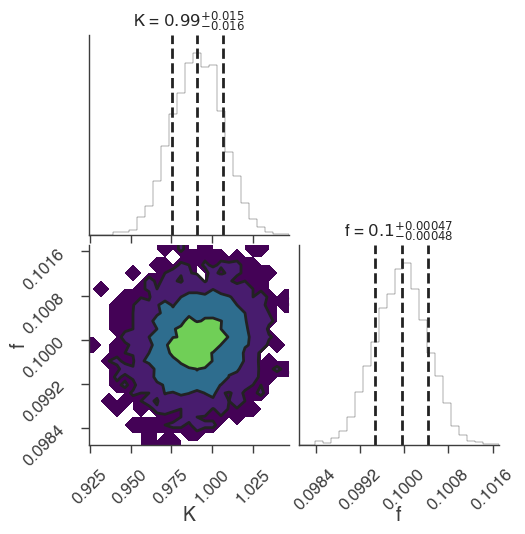

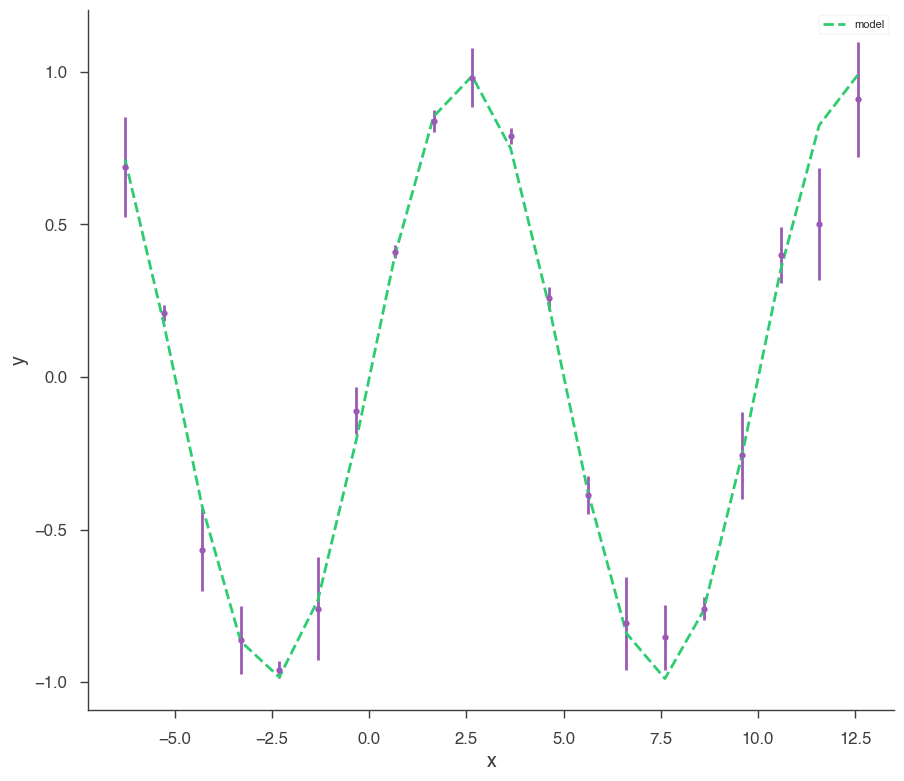

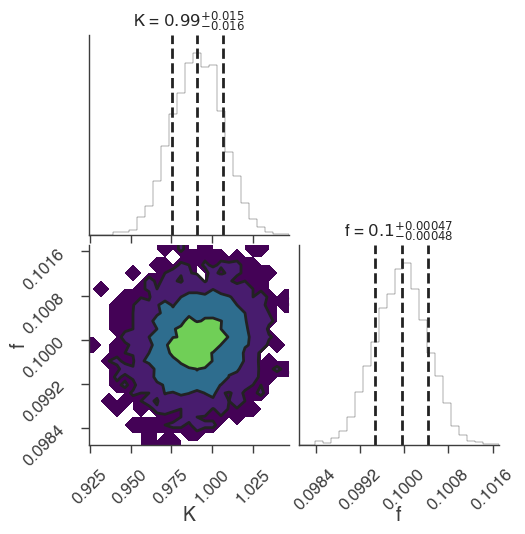

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

22:19:21 INFO      sampler set to zeus                                                     ]8;id=447752;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=336366;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 5/625 [00:00<00:16, 37.05it/s]

Sampling progress :   1%|▏         | 9/625 [00:00<00:20, 30.64it/s]

Sampling progress :   2%|▏         | 13/625 [00:00<00:20, 29.41it/s]

Sampling progress :   3%|▎         | 18/625 [00:00<00:17, 33.91it/s]

Sampling progress :   4%|▎         | 22/625 [00:00<00:18, 33.45it/s]

Sampling progress :   4%|▍         | 26/625 [00:00<00:18, 32.46it/s]

Sampling progress :   5%|▍         | 30/625 [00:00<00:18, 32.39it/s]

Sampling progress :   5%|▌         | 34/625 [00:01<00:18, 32.38it/s]

Sampling progress :   6%|▌         | 39/625 [00:01<00:16, 35.46it/s]

Sampling progress :   7%|▋         | 45/625 [00:01<00:14, 40.21it/s]

Sampling progress :   8%|▊         | 50/625 [00:01<00:15, 37.33it/s]

Sampling progress :   9%|▊         | 54/625 [00:01<00:20, 28.29it/s]

Sampling progress :   9%|▉         | 58/625 [00:01<00:19, 28.80it/s]

Sampling progress :  10%|▉         | 62/625 [00:01<00:18, 30.55it/s]

Sampling progress :  11%|█         | 67/625 [00:02<00:17, 32.22it/s]

Sampling progress :  11%|█▏        | 71/625 [00:02<00:16, 33.59it/s]

Sampling progress :  12%|█▏        | 75/625 [00:02<00:16, 32.53it/s]

Sampling progress :  13%|█▎        | 79/625 [00:02<00:16, 33.35it/s]

Sampling progress :  13%|█▎        | 83/625 [00:02<00:15, 34.59it/s]

Sampling progress :  14%|█▍        | 88/625 [00:02<00:15, 35.80it/s]

Sampling progress :  15%|█▍        | 93/625 [00:02<00:14, 37.55it/s]

Sampling progress :  16%|█▌        | 97/625 [00:02<00:18, 28.14it/s]

Sampling progress :  16%|█▋        | 103/625 [00:03<00:15, 34.28it/s]

Sampling progress :  17%|█▋        | 109/625 [00:03<00:13, 39.61it/s]

Sampling progress :  18%|█▊        | 114/625 [00:03<00:16, 31.64it/s]

Sampling progress :  19%|█▉        | 118/625 [00:03<00:15, 32.07it/s]

Sampling progress :  20%|█▉        | 122/625 [00:03<00:15, 33.14it/s]

Sampling progress :  20%|██        | 127/625 [00:03<00:14, 35.35it/s]

Sampling progress :  21%|██        | 131/625 [00:03<00:14, 34.74it/s]

Sampling progress :  22%|██▏       | 136/625 [00:04<00:13, 36.68it/s]

Sampling progress :  22%|██▏       | 140/625 [00:04<00:13, 35.81it/s]

Sampling progress :  23%|██▎       | 144/625 [00:04<00:13, 35.56it/s]

Sampling progress :  24%|██▍       | 149/625 [00:04<00:12, 39.27it/s]

Sampling progress :  25%|██▍       | 154/625 [00:04<00:12, 37.65it/s]

Sampling progress :  25%|██▌       | 158/625 [00:04<00:15, 31.00it/s]

Sampling progress :  26%|██▌       | 162/625 [00:04<00:14, 32.23it/s]

Sampling progress :  27%|██▋       | 167/625 [00:04<00:13, 34.67it/s]

Sampling progress :  27%|██▋       | 171/625 [00:05<00:12, 35.66it/s]

Sampling progress :  28%|██▊       | 175/625 [00:05<00:12, 35.97it/s]

Sampling progress :  29%|██▉       | 180/625 [00:05<00:11, 37.69it/s]

Sampling progress :  30%|██▉       | 185/625 [00:05<00:11, 39.95it/s]

Sampling progress :  30%|███       | 190/625 [00:05<00:14, 30.29it/s]

Sampling progress :  31%|███       | 195/625 [00:05<00:13, 32.85it/s]

Sampling progress :  32%|███▏      | 200/625 [00:05<00:11, 35.55it/s]

Sampling progress :  33%|███▎      | 207/625 [00:05<00:09, 42.17it/s]

Sampling progress :  34%|███▍      | 213/625 [00:06<00:09, 45.66it/s]

Sampling progress :  35%|███▍      | 218/625 [00:06<00:09, 44.14it/s]

Sampling progress :  36%|███▌      | 223/625 [00:06<00:09, 43.07it/s]

Sampling progress :  37%|███▋      | 229/625 [00:06<00:08, 46.58it/s]

Sampling progress :  37%|███▋      | 234/625 [00:06<00:08, 46.52it/s]

Sampling progress :  38%|███▊      | 240/625 [00:06<00:08, 47.80it/s]

Sampling progress :  39%|███▉      | 245/625 [00:06<00:07, 47.97it/s]

Sampling progress :  40%|████      | 251/625 [00:06<00:07, 49.20it/s]

Sampling progress :  41%|████      | 257/625 [00:07<00:07, 51.00it/s]

Sampling progress :  42%|████▏     | 263/625 [00:07<00:06, 52.25it/s]

Sampling progress :  43%|████▎     | 269/625 [00:07<00:06, 54.02it/s]

Sampling progress :  44%|████▍     | 275/625 [00:07<00:06, 50.64it/s]

Sampling progress :  45%|████▍     | 281/625 [00:07<00:07, 48.72it/s]

Sampling progress :  46%|████▌     | 286/625 [00:07<00:07, 46.47it/s]

Sampling progress :  47%|████▋     | 291/625 [00:07<00:09, 34.72it/s]

Sampling progress :  47%|████▋     | 296/625 [00:08<00:11, 28.40it/s]

Sampling progress :  48%|████▊     | 300/625 [00:08<00:12, 25.31it/s]

Sampling progress :  49%|████▊     | 304/625 [00:08<00:11, 27.84it/s]

Sampling progress :  49%|████▉     | 308/625 [00:08<00:11, 28.79it/s]

Sampling progress :  50%|████▉     | 312/625 [00:08<00:12, 25.12it/s]

Sampling progress :  51%|█████     | 318/625 [00:08<00:09, 31.72it/s]

Sampling progress :  52%|█████▏    | 323/625 [00:08<00:08, 35.13it/s]

Sampling progress :  52%|█████▏    | 327/625 [00:09<00:10, 28.45it/s]

Sampling progress :  53%|█████▎    | 333/625 [00:09<00:13, 22.02it/s]

Sampling progress :  54%|█████▍    | 338/625 [00:09<00:12, 23.88it/s]

Sampling progress :  55%|█████▍    | 341/625 [00:09<00:13, 20.93it/s]

Sampling progress :  55%|█████▌    | 345/625 [00:10<00:11, 23.59it/s]

Sampling progress :  56%|█████▌    | 349/625 [00:10<00:12, 21.43it/s]

Sampling progress :  56%|█████▋    | 352/625 [00:10<00:12, 21.92it/s]

Sampling progress :  57%|█████▋    | 355/625 [00:10<00:11, 23.41it/s]

Sampling progress :  57%|█████▋    | 359/625 [00:10<00:09, 26.71it/s]

Sampling progress :  58%|█████▊    | 362/625 [00:10<00:09, 27.21it/s]

Sampling progress :  59%|█████▊    | 366/625 [00:10<00:08, 29.81it/s]

Sampling progress :  59%|█████▉    | 370/625 [00:10<00:07, 31.93it/s]

Sampling progress :  60%|█████▉    | 374/625 [00:11<00:08, 31.07it/s]

Sampling progress :  60%|██████    | 378/625 [00:11<00:08, 30.09it/s]

Sampling progress :  61%|██████    | 382/625 [00:11<00:07, 31.62it/s]

Sampling progress :  62%|██████▏   | 387/625 [00:11<00:06, 34.76it/s]

Sampling progress :  63%|██████▎   | 392/625 [00:11<00:06, 38.21it/s]

Sampling progress :  64%|██████▎   | 397/625 [00:11<00:05, 39.10it/s]

Sampling progress :  64%|██████▍   | 401/625 [00:12<00:10, 21.43it/s]

Sampling progress :  65%|██████▍   | 406/625 [00:12<00:08, 25.48it/s]

Sampling progress :  66%|██████▌   | 411/625 [00:12<00:07, 29.60it/s]

Sampling progress :  67%|██████▋   | 416/625 [00:12<00:06, 32.79it/s]

Sampling progress :  67%|██████▋   | 421/625 [00:12<00:05, 35.08it/s]

Sampling progress :  68%|██████▊   | 425/625 [00:12<00:05, 33.34it/s]

Sampling progress :  69%|██████▊   | 429/625 [00:12<00:05, 33.10it/s]

Sampling progress :  69%|██████▉   | 433/625 [00:12<00:06, 31.51it/s]

Sampling progress :  70%|██████▉   | 437/625 [00:13<00:06, 29.50it/s]

Sampling progress :  71%|███████   | 443/625 [00:13<00:05, 36.27it/s]

Sampling progress :  72%|███████▏  | 449/625 [00:13<00:04, 40.21it/s]

Sampling progress :  73%|███████▎  | 455/625 [00:13<00:03, 43.22it/s]

Sampling progress :  74%|███████▎  | 460/625 [00:13<00:03, 44.57it/s]

Sampling progress :  75%|███████▍  | 466/625 [00:13<00:03, 46.94it/s]

Sampling progress :  75%|███████▌  | 471/625 [00:13<00:03, 40.10it/s]

Sampling progress :  76%|███████▌  | 476/625 [00:13<00:03, 39.78it/s]

Sampling progress :  77%|███████▋  | 481/625 [00:14<00:03, 41.18it/s]

Sampling progress :  78%|███████▊  | 488/625 [00:14<00:02, 47.71it/s]

Sampling progress :  79%|███████▉  | 493/625 [00:14<00:02, 47.37it/s]

Sampling progress :  80%|███████▉  | 498/625 [00:14<00:02, 44.09it/s]

Sampling progress :  80%|████████  | 503/625 [00:14<00:03, 34.39it/s]

Sampling progress :  81%|████████▏ | 508/625 [00:14<00:03, 36.24it/s]

Sampling progress :  82%|████████▏ | 513/625 [00:14<00:02, 37.80it/s]

Sampling progress :  83%|████████▎ | 518/625 [00:15<00:02, 38.43it/s]

Sampling progress :  84%|████████▎ | 523/625 [00:15<00:02, 38.98it/s]

Sampling progress :  84%|████████▍ | 528/625 [00:15<00:02, 39.42it/s]

Sampling progress :  85%|████████▌ | 533/625 [00:15<00:02, 38.51it/s]

Sampling progress :  86%|████████▌ | 538/625 [00:15<00:02, 40.08it/s]

Sampling progress :  87%|████████▋ | 543/625 [00:15<00:01, 41.09it/s]

Sampling progress :  88%|████████▊ | 548/625 [00:15<00:01, 40.80it/s]

Sampling progress :  88%|████████▊ | 553/625 [00:15<00:01, 40.26it/s]

Sampling progress :  89%|████████▉ | 558/625 [00:16<00:01, 41.72it/s]

Sampling progress :  90%|█████████ | 563/625 [00:16<00:01, 43.32it/s]

Sampling progress :  91%|█████████ | 568/625 [00:16<00:01, 42.96it/s]

Sampling progress :  92%|█████████▏| 573/625 [00:16<00:01, 42.23it/s]

Sampling progress :  92%|█████████▏| 578/625 [00:16<00:01, 42.40it/s]

Sampling progress :  93%|█████████▎| 584/625 [00:16<00:00, 44.94it/s]

Sampling progress :  94%|█████████▍| 590/625 [00:16<00:00, 47.66it/s]

Sampling progress :  95%|█████████▌| 595/625 [00:16<00:00, 45.74it/s]

Sampling progress :  96%|█████████▌| 600/625 [00:16<00:00, 41.76it/s]

Sampling progress :  97%|█████████▋| 605/625 [00:17<00:00, 40.96it/s]

Sampling progress :  98%|█████████▊| 610/625 [00:17<00:00, 42.92it/s]

Sampling progress :  99%|█████████▊| 616/625 [00:17<00:00, 46.33it/s]

Sampling progress : 100%|█████████▉| 622/625 [00:17<00:00, 48.13it/s]

Sampling progress : 100%|██████████| 625/625 [00:17<00:00, 35.77it/s]

22:19:39 INFO      fit restored to maximum of posterior                                         ]8;id=230567;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=385443;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=736100;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=129713;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 36


Scale Factor: 1.160638


Mean Integrated Autocorrelation Time: 3.2


Effective Sample Size: 3909.9


Number of Log Probability Evaluations: 66005


Effective Samples per Log Probability Evaluation: 0.059236


None


Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                         
demo.spectrum.main.Sin.K  (9.91 +/- 0.16) x 10^-1  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (9.99 +/- 0.05) x 10^-2        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo         -6.598622
total        -6.598622

Values of statistical measures:

statistical measures
AIC              17.903126
BIC              19.188708
DIC              17.120586
PDIC              1.961771

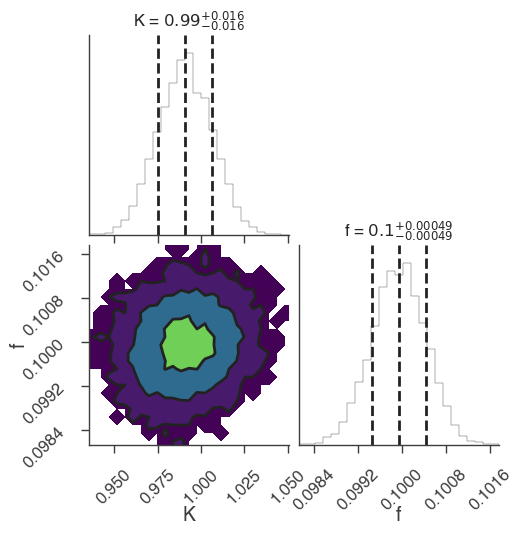

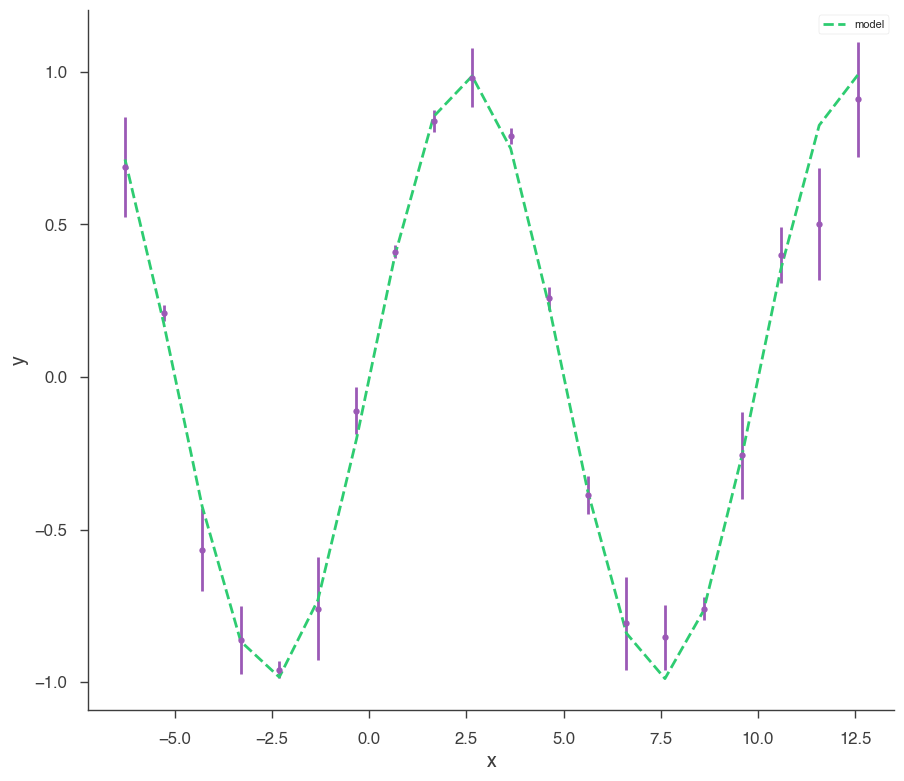

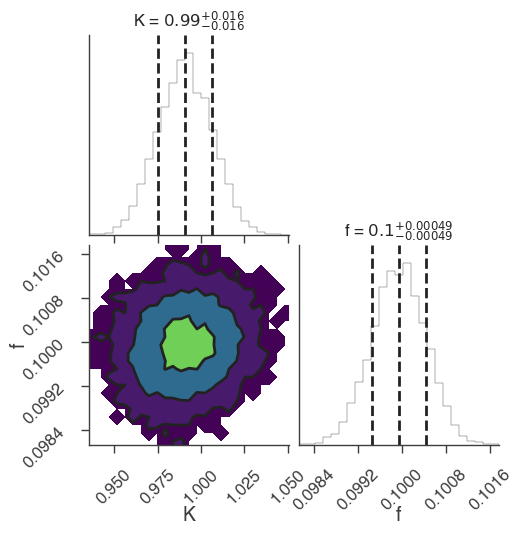

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

22:19:40 INFO      sampler set to ultranest                                                ]8;id=973595;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=457671;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-7  


[ultranest] Likelihood function evaluations: 6243


[ultranest]   logZ = -15.99 +- 0.09775


[ultranest] Effective samples strategy satisfied (ESS = 983.7, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.05 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.14 bs:0.10 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


22:19:52 INFO      fit restored to maximum of posterior                                         ]8;id=728127;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=550149;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=53956;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=330016;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                            
demo.spectrum.main.Sin.K  (9.92 -0.16 +0.15) x 10^-1  1 / (cm2 keV s)
demo.spectrum.main.Sin.f     (9.99 +/- 0.05) x 10^-2        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo         -6.602016
total        -6.602016

Values of statistical measures:

statistical measures
AIC                17.909915
BIC                19.195497
DIC                17.190724
PDIC                1.996892
log(Z)             -6.946315

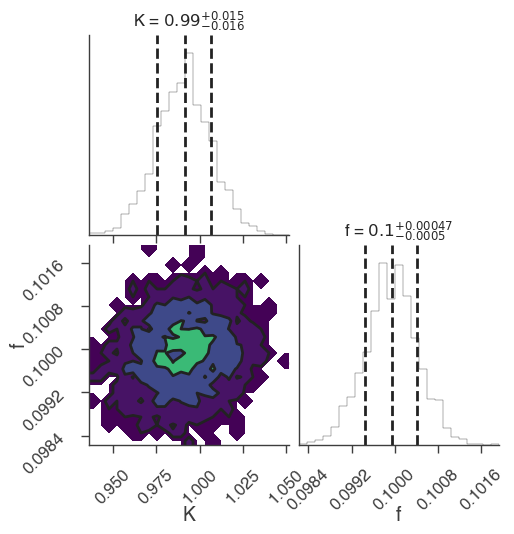

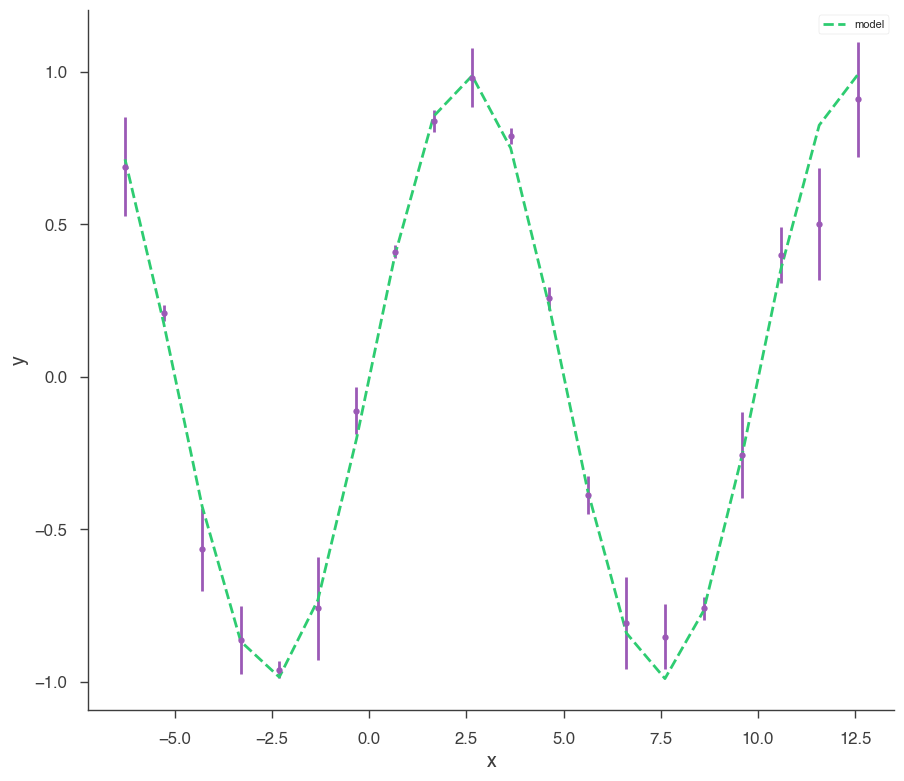

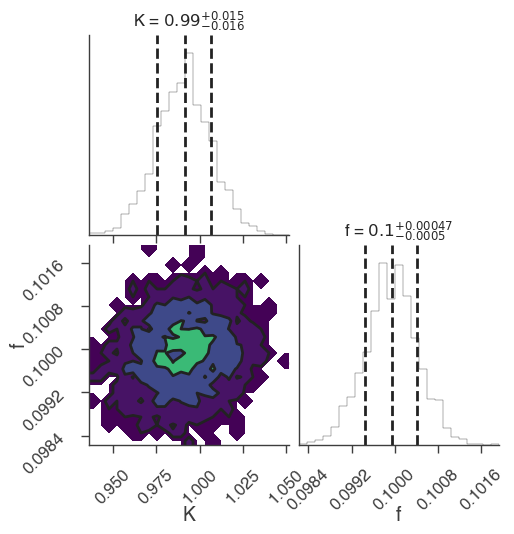

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()